In [56]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [57]:
def osc(y_v, t, omega2=1):
    dy = y_v[1]
    dv = -omega2*y_v[0]
    return array([dy, dv])

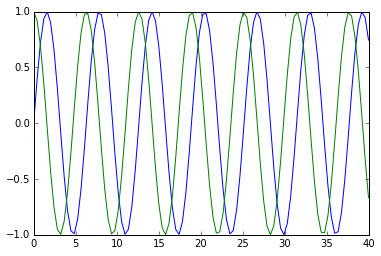

In [58]:
t = linspace(0,40, 100)
ini = array([0,1])

sol = odeint(osc, ini, t)
plot(t, sol[:,0])
plot(t, sol[:,1])

In [59]:
def root_trayect(func, pto_i, ti, error=1e-5):
    while abs(pto_i[0])>error:
        ti1 = ti - pto_i[0]/pto_i[1]
        sol = odeint(func, pto_i, [ti,ti1])
        ti = ti1
        pto_i = sol[-1]
    return ti, pto_i

In [60]:
ind = 10

ti = t[ind]
pto_i = sol[ind]
root_trayect(osc, pto_i, ti, error=1e-5)

(3.1415913642546212, array([  1.39153185e-06,  -9.99999892e-01]))

In [61]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,2))
j=0
for i in range(len(t)-1):
    if sol[i][0]*sol[i+1][0]<0:
        raices[j], puntos[j] = root_trayect(osc, sol[i], t[i], error=1e-5)
        j += 1
raices = raices[0:j]
puntos = puntos[0:j]

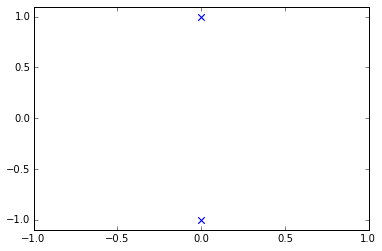

In [62]:
xlim(-1,1)
ylim(-1.1,1.1)
plot(puntos[:,0], puntos[:,1], 'x')

In [63]:
def osc_fric(y_v, t, omega2=1, gamma=0.1):
    dy = y_v[1]
    dv = -omega2*y_v[0] - gamma*y_v[1]
    return array([dy, dv])

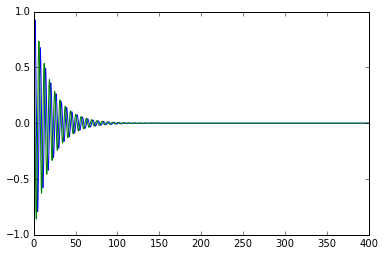

In [64]:
t = linspace(0, 400, 10000)
ini = array([0,1])

sol = odeint(osc_fric, ini, t)
plot(t, sol[:,0])
plot(t, sol[:,1])

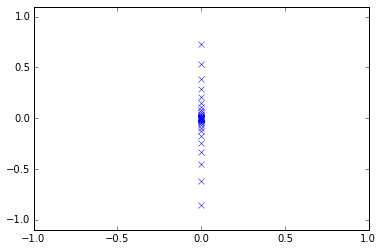

In [65]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,2))
j=0
for i in range(len(t)-1):
    if sol[i][0]*sol[i+1][0]<0:
        raices[j], puntos[j] = root_trayect(osc_fric, sol[i], t[i], error=1e-5)
        j += 1
raices = raices[0:j]
puntos = puntos[0:j]

xlim(-1,1)
ylim(-1.1,1.1)
plot(puntos[:,0], puntos[:,1], 'x')

Consideremos el sistema de dos partículas de masas $m_1$ y $m_2$ cuyo hamiltoniano esta dado por: 
$$E=H(x,y,p_x,p_y)=\frac{1}{2}(\frac{p_x^2}{m_1}+\frac{p_y^2}{m_2})+V(x,y)$$.

Si $V(x,y)=-\frac{k}{r}=-\frac{k}{\sqrt{x^2+y^2}}$, entonces $E=\frac{1}{m_1}\frac{1}{2}(p_x^2+\epsilon p_y^2)-\frac{k}{\sqrt{x^2+y^2}}$, en donde definimos $\epsilon=\frac{m_1}{m_2}$. Con esto, podemos reescalar el problema para eliminar el factor de $m_1$ en la energía cinética. Además, al hacer un reescalamiento del tiempo se puede eliminar la constante $k*m_1$ en el potencial. De este modo el sistema se puede reducir simplemente a un hamiltoniano dado por:

$$E'=\frac{1}{2}(p_x^2+\epsilon p_y^2)-\frac{1}{\sqrt{x^2+y^2}}$$.

Observemos que, si $\epsilon=1$, se tiene el mismo hamiltoniano que el del problema de Kepler.

In [66]:
def ec_mov(x_p,t,epsilon=1.): #x_p=(x,y,px,py)
    r32=(x_p[0]**2+x_p[1]**2)**(1.5)
    dx=x_p[2]
    dy= epsilon*x_p[3]
    dpx= -x_p[0]/r32
    dpy= -x_p[1]/r32
    return array([dx,dy,dpx,dpy])

def energia(x_p,epsilon=1.):
    r=sqrt(x_p[0]**2+x_p[1]**2)
    E=0.5*(x_p[2]**2+epsilon*x_p[3]**2)-1./r
    return E

def cond_ini(ang_ini,var=0.001):
    angulo=ang_ini+var*(2.*rand()-1.)
    x,y=cos(angulo),sin(angulo)
    return array([x,y,0.5,0.5])

Tomamos varios puntos iniciales dentro de un circulo con la misma energia potencial. Al jugar con los valores de $\epsilon$ podemos ver que entre más se aleje el valor de 1, el sistema será más caótico.

E=  -0.6875 E_f= -0.687500001549
E=  -0.6875 E_f= -0.687500001341
E=  -0.6875 E_f= -0.687500001763
E=  -0.6875 E_f= -0.687500013068
E=  -0.6875 E_f= -0.687499997068
E=  -0.6875 E_f= -0.687500000583
E=  -0.6875 E_f= -0.687499999305
E=  -0.6875 E_f= -0.687500002226
E=  -0.6875 E_f= -0.687499998916
E=  -0.6875 E_f= -0.687499964469
E=  -0.6875 E_f= -0.687500001405
E=  -0.6875 E_f= -0.687499996996


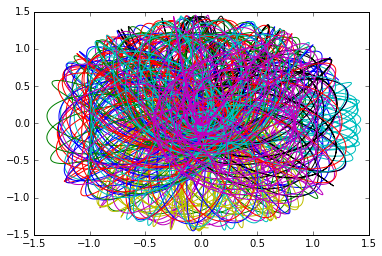

In [67]:
t= arange(0,100,.0001)
for i in xrange(12):
    eps=1.5
    pto_ini=[cos(i),sin(i),.5,.5]
    sol = odeint(ec_mov,pto_ini,t,args=(eps,),atol=1e-12,rtol=1e-12)
    print "E= ", energia(pto_ini,eps), "E_f=", energia(sol[-1],eps)
    plot(sol[:,0],sol[:,1])
show()

Ahora, tomamos varias condiciones iniciales cercanas y las integramos para ver qué tanto se separan las trayectorias.

E=  -0.725 E_f= -0.725002750613
E=  -0.725 E_f= -0.725000830433
E=  -0.725 E_f= -0.725006146798
E=  -0.725 E_f= -0.725003100813
E=  -0.725 E_f= -0.725004103699
E=  -0.725 E_f= -0.725003634417
E=  -0.725 E_f= -0.725003290216
E=  -0.725 E_f= -0.725006079487
E=  -0.725 E_f= -0.725002926948
E=  -0.725 E_f= -0.725003984269


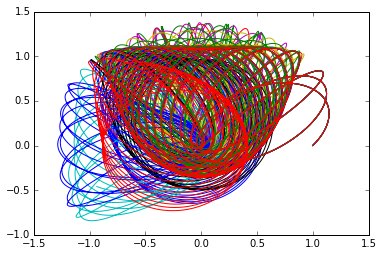

In [68]:
t=arange(0,100,.0001)
eps=1.2
for i in xrange(10):
    pto_ini=cond_ini(0) #hacer variaciones en tornos del angulo cero
    sol=odeint(ec_mov,pto_ini,t,args=(eps,),atol=1e-9,rtol=1e-9)
    plot(sol[:,0],sol[:,1])
    print "E= ", energia(pto_ini,eps), "E_f=",energia(sol[-1],eps)
show()

Observamos que entre más alejado sea el valor de $\epsilon$ de 1, las soluciones se alejan cada vez más entre sí,i.e. el sistema es mucho más caótico.

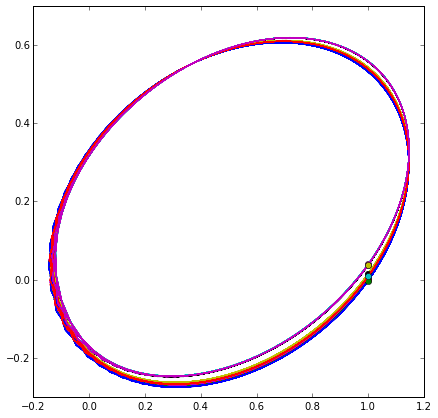

In [69]:
t=linspace(0,50,1000)
fig=figure(figsize=(7,7))
ax=fig.add_subplot(111)

for i in xrange(10):
    p_ini = cond_ini(0,var=0.04)
    sol=odeint(ec_mov,p_ini,t,args=(1.,),atol=1e-11,rtol=1e-11)
    ax.plot(sol[:,0],sol[:,1])
    ax.plot(sol[0,0],sol[0,1],marker='o')

Ahora, sabemos que en coordenadas polares la energía esta dada por: $$E'=\frac{1}{2}(p_{\rho}^2+\frac{p_{\theta}^2}{\rho^2})-\frac{1}{\rho}$$

Esto nos dice que $\theta$ es una coordenada cícicla,  por lo que $\frac{\partial E'}{\partial \theta}=p_{\theta}$ es constante. Además, $\theta$ es $2\pi$-periódica, por lo que el espacio fase solo dependerá de $\rho,p_{\rho},\theta$ y bastará con barrer $\theta$ entre $0$ y $2\pi$.

In [70]:
def p_rho(x):
    r=sqrt(x[:,0]*x[:,0]+x[:,1]*x[:,1])
    p=(x[:,2]*x[:,0]+x[:,3]*x[:,1])/r
    return r,p

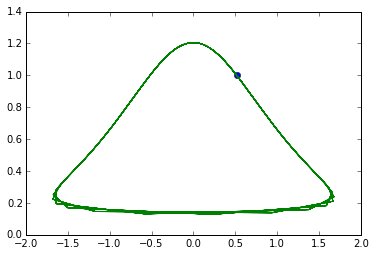

In [71]:
pr,r=p_rho(sol)
plot(r[0],pr[0],'o')
plot(r,pr)
show()

In [72]:
def root_trayec(func,pto_i,ti,error=1e-5):
    while abs(pto_i[0])>error:
        tip1=ti-(pto_i[0]/pto_i[2])
        paso=odeint(func,pto_i,[ti,tip1])
        ti,pto_i=tip1,paso[-1]
    return ti,pto_i

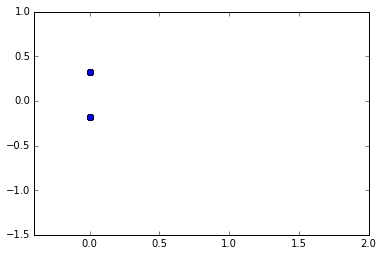

In [73]:
num= len(t)
raices=zeros(num)
puntos=zeros((num,4))
j=0
for i in xrange(len(t)-1):
    if (sol[i][0]*sol[i+1][0])<0:
        raices[j],puntos[j]=root_trayec(ec_mov,sol[i],t[i])
        j+=1
raices,puntos=raices[0:j],puntos[0:j]
xlim([-0.4,2]),ylim([-1.5,1])
plot(puntos[:,0],puntos[:,1],'o')
#puntos(sol[:,0],sol[:,1])
show()

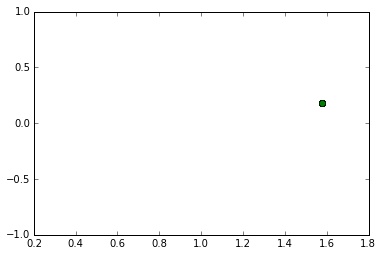

In [74]:
pr,r=p_rho(puntos)
xlim([0.2,1.8]),ylim([-1,1])
plot(r[0],pr[0],'o')
plot(r,pr,'o')
show()